---
title: "Iris Pattern Recognition"
date: 2020-01-07
tags: [data analytics, pattern recognition]
excerpt: "Data Wrangling, Data Science, Messy Data"
mathjax: "true"
---

# Iris Dataset : Pattern Recognition

## Import all necessary libraries

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Load Iris.csv into a Pandas dataframe

In [151]:
iris = pd.read_csv("iris.csv", header=None) #Dataframe upload
iris = iris.rename(columns={0:"Sepal.Length", 1:"Sepal.Width", 2:"Petal.Length", 3:"Petal.Width", 4:"Species"})
iris.head(n=10) #Display first 10 row from the dataset


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## Determine the mean and median present in the dataset

In [36]:
iris.groupby('Species').agg(['mean', 'median'])

Sepal.Length        Sepal.Width        Petal.Length         \
                        mean median        mean median         mean median   
Species                                                                      
Iris-setosa            5.006    5.0       3.418    3.4        1.464   1.50   
Iris-versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
Iris-virginica         6.588    6.5       2.974    3.0        5.552   5.55   

                Petal.Width         
                       mean median  
Species                             
Iris-setosa           0.244    0.2  
Iris-versicolor       1.326    1.3  
Iris-virginica        2.026    2.0

## Determine the standard deviation of the data

In [38]:
iris.groupby('Species').std()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
Iris-setosa,0.352490,0.381024,0.173511,0.107210
Iris-versicolor,0.516171,0.313798,0.469911,0.197753
Iris-virginica,0.635880,0.322497,0.551895,0.274650


## Box Plot and Violin Plot

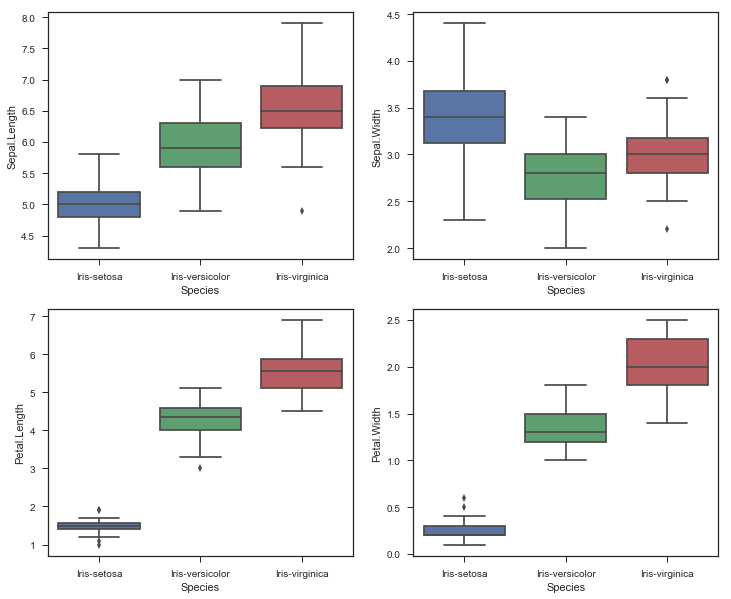

In [39]:
#Box Plot

#Plotting the box plot using Seaborn library

sns.set(style="ticks")
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x='Species', y='Sepal.Length', data=iris)
plt.subplot(2,2,2)
sns.boxplot(x='Species', y='Sepal.Width', data=iris)
plt.subplot(2,2,3)
sns.boxplot(x='Species', y='Petal.Length', data=iris)
plt.subplot(2,2,4)
sns.boxplot(x='Species', y='Petal.Width', data=iris)
plt.show()

The isolated points that can be seen in the box-plots above are the outliers in the data. Since these are very few in number, it wouldn't have any significant impact on our analysis.

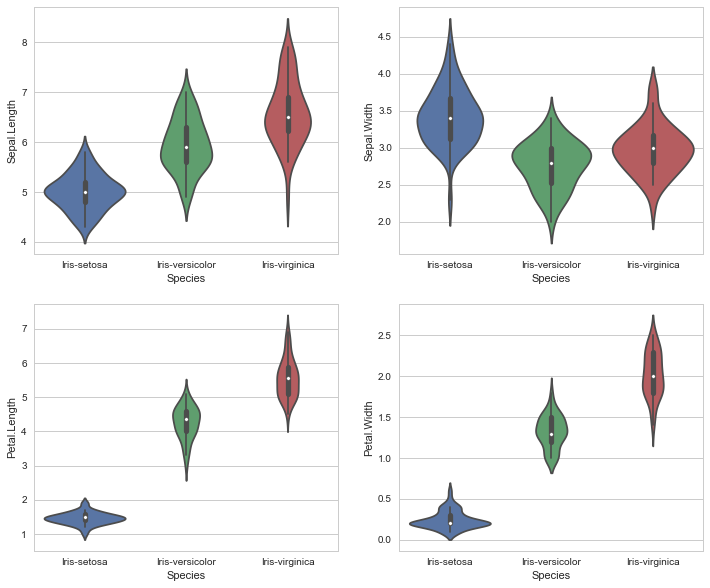

In [40]:
#Violin Plot

sns.set(style="whitegrid")
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species', y='Sepal.Length', data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species', y='Sepal.Width', data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species', y='Petal.Length', data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species', y='Petal.Width', data=iris)
plt.show()

Violin plots typically are more informative as compared to the box plots as violin plots also represent the underlying distribution of the data in addition to the statistical summary.

Probability Density Function (PDF) & Cumulative Distribution Function (CDF)

Uni-variate as the name suggests is one variable analysis. Our ultimate aim is to be able to correctly identify the specie of Iris flower given it’s features — sepal length, sepal width, petal length and petal width. Which among the four features is more useful than other variables in order to distinguish between the species of Iris flower ? To answer this, we will plot the probability density function(PDF) with each feature as a variable on X-axis and it’s histogram and corresponding kernel density plot on Y-axis.

Before we begin further analysis, we need to split the Data Frame according to the 3 distinct class-labels — Setosa, Versicolor and Virginica.

In [44]:
iris_setosa = iris[iris["Species"]=="Iris-setosa"]
iris_versicolor = iris[iris["Species"]=="Iris-versicolor"]
iris_virginica = iris[iris["Species"]=="Iris-virginica"]

Plotting the Histogram & PDF using Seaborn FacetGrid object

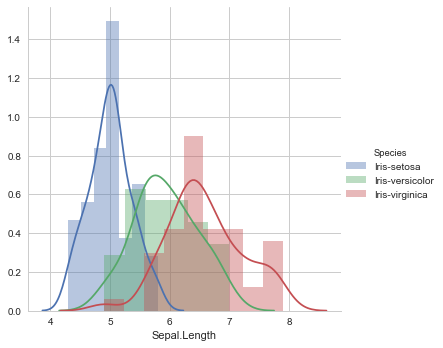

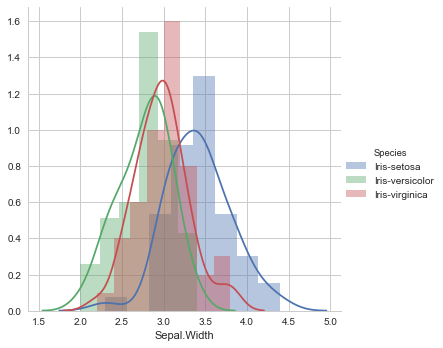

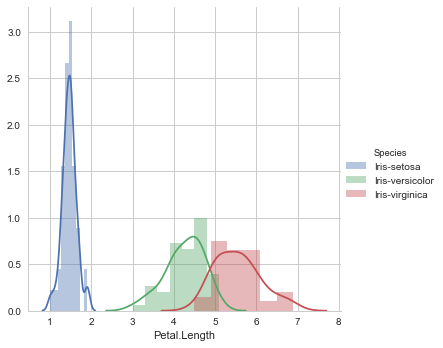

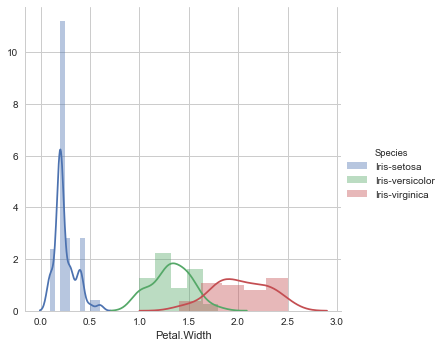

In [70]:
#FacetGrid object visualize
sns.FacetGrid(iris, hue="Species", size=5) \
   .map(sns.distplot, "Sepal.Length") \
       .add_legend(); #Plot 1
sns.FacetGrid(iris, hue="Species", size=5) \
   .map(sns.distplot, "Sepal.Width") \
       .add_legend(); #Plot 2
sns.FacetGrid(iris, hue="Species", size=5) \
   .map(sns.distplot, "Petal.Length") \
       .add_legend(); #Plot 3
sns.FacetGrid(iris, hue="Species", size=5) \
   .map(sns.distplot, "Petal.Width") \
       .add_legend(); #Plot 4
plt.show()

The density plot alongside(Plot 1) reveals that there is a significant amount of overlap between the species on sepal length, so it wouldn’t be a good idea to consider sepal length as a distinctive feature in our uni-variate analysis.

With sepal width as a classification feature(Plot 2), the overlap is even more than sepal length as seen in Plot 1 above. The spread of the data is also high. So, again we cannot make any comment on the specie of the flower given it’s sepal width only.

The density plot of petal length alongside(Plot 3) looks promising from the point of view of uni-variate classification. The Setosa species are well separated from Versicolor and Virginica, although there is some overlap between the Versicolor and Virginica, but not as bad as the the above two plots.

The density plot of petal width alongside(Plot 4) also looks good. There is slight intersection between the Setosa and Versicolor species, while the overlap between the Versicolor and Virginica is somewhat similar to that of petal length(Plot 3).

To summarize, if we have to choose one feature for classification, we will pick petal length (Plot 3) to distinguish among the species. If we have to select two features, then we will choose petal width as the second feature, but then again it would be a wiser to look at pair-plots(bi-variate and multivariate analysis) to determine which two features are most useful in classification.

We have already established above how petal length could stand out as an useful metric to differentiate between the species of Iris flower. From our preliminary investigation, below pseudo-code can be constructed —
(Note that this estimation is based on the kernel density smoothed probability distribution plots obtained from histograms)

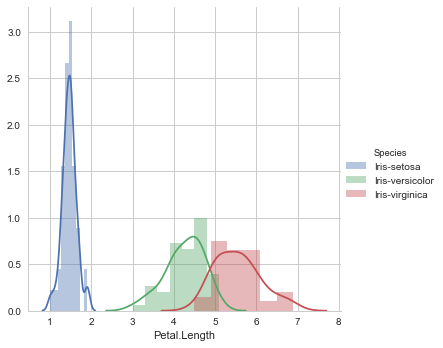

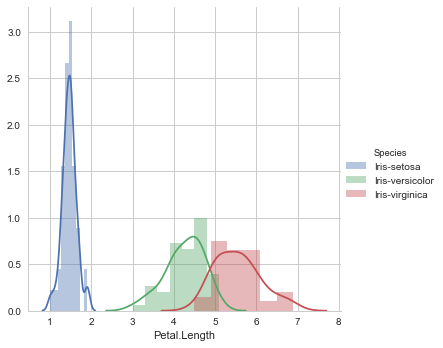

In [72]:
sns.FacetGrid(iris, hue="Species", size=5) \
   .map(sns.distplot, "Petal.Length") \
       .add_legend(); #Plot 3
plt.show()

If petal_length < 2.1
then specie = ‘Setosa’
else if petal_length > 2.1 and petal_length < 4.8
then specie = ‘Versicolor’
else if petal_length > 4.8
then specie = ‘Virginica’
*all lengths are in centimeters.

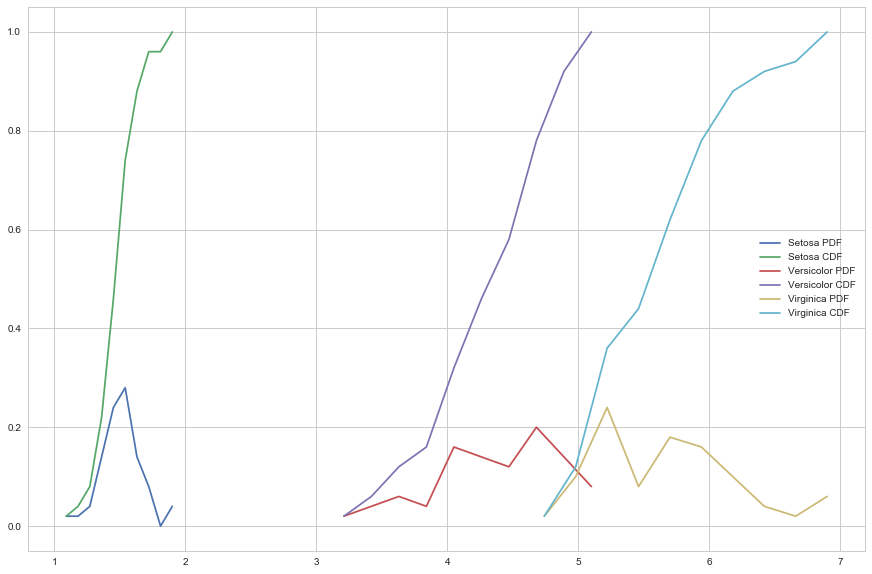

In [127]:
plt.figure(figsize=(15,10))

counts, bin_edges_setosa = np.histogram(iris_setosa['Petal.Length'], bins=10, density= True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges_setosa[1:], pdf, label='Setosa PDF')
plt.plot(bin_edges_setosa[1:], cdf, label='Setosa CDF')

counts, bin_edges_versicolor = np.histogram(iris_versicolor['Petal.Length'], bins=10, density= True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges_versicolor[1:], pdf, label='Versicolor PDF')
plt.plot(bin_edges_versicolor[1:], cdf, label='Versicolor CDF')

counts, bin_edges_virginica = np.histogram(iris_virginica['Petal.Length'], bins=10, density= True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges_virginica[1:], pdf, label='Virginica PDF')
plt.plot(bin_edges_virginica[1:], cdf, label='Virginica CDF')

plt.legend()
plt.show()

Percentage of Virginica Petal Length under 5 cm :

In [144]:
vers_above_5 = (max(bin_edges_versicolor[1:])-5) / (max(bin_edges_versicolor[1:]) - min(bin_edges_versicolor[1:]))
vers_above_5 = vers_above_5 * 100
print str(round(vers_above_5, 2)) + "%" 

5.29%


Percentage of Virginica Petal Length under 5 cm :

In [147]:
virg_below_5 = (5-min(bin_edges_virginica[1:])) / (max(bin_edges_virginica[1:])-min(bin_edges_virginica[1:]))
virg_below_5 = virg_below_5 * 100
print str(round(virg_below_5, 2)) + "%"

12.04%


From the above CDF plots, it can be seen that 100 % of the Setosa flower species have petal length less than 1.9. Near about 95 % of the Versicolor flowers have petal length less than 5, while about 12% of the Virginica flowers have petal length less than 5. So, we will incorporate our newly found insights into our previously written pseudo-code to construct a simple uni-variate ‘classification model’.

If petal_length < 1.9
then specie = ‘Setosa’
(accuracy = 100%)
else if petal_length > 3.2 and petal_length < 5
then specie = ‘Versicolor’
(accuracy = 94.71%)…
…else if petal_length > 5
then specie = ‘Virginica’
(accuracy = 87.96%)

Thus by using the cumulative distribution plot, we get a better picture and robust understanding of distribution leading to formulation of simple uni-variate classification model.